In [ ]:
!pip install pdpbox
!pip install tox tox-venv
!pip install shap
!pip install eli5
!pip install xgboost
!pip install category_encoders 
!pip install -U scikit-learn
!pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import warnings

from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
!apt-get install openjdk-8-jdk-headless
!wget -q https://mirror.navercorp.com/apache/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"
import findspark

findspark.init()
import pyspark

spark = pyspark.sql.SparkSession.builder.appName("test").master("local[*]").getOrCreate()

     |████████████████████████████████| 34.0 MB 141 kB/s 
     |████████████████████████████████| 13.1 MB 25.7 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=cb7b0cb1dfb5ebbbe4219a0a6b91b1523cdef68c3e9168216882b03017434f63
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 8.8 MB 30.4 MB/s 
     |████████████████████████████████| 461 kB 53.6 MB/s 
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytest 3.6.4 requires pluggy<0.8,>=0.5, but you have pluggy 1.0.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 564 kB 5.3 MB/s 
     |████████████████████████████████| 216 kB 5.1 MB/s 
     |████████████████████████████████| 133 kB 34.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=e3d292454efca567efb903a8a8f4ef91960a083afb217a28972afcf180736

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
operators = pd.read_csv('/content/gdrive/MyDrive/cpding/asdf/레식 데이터.csv', sep=',')


In [ ]:
operators['k/d_ratio'] = pd.to_numeric(operators['nbkills']) / pd.to_numeric(operators['nbdeaths'])
operators['win_ratio'] = pd.to_numeric(operators['nbwins']) / pd.to_numeric(operators['nbpicks'])
encoder = OneHotEncoder(use_cat_names= True)

In [ ]:
del_rank = ["Bronze", "Copper", "Unranked"]

for rank in del_rank:
  operators_del_rank = operators[operators["skillrank"] == rank].index 
  operators = operators.drop(operators_del_rank)

# 코퍼, 브론즈, 언랭크는 보통 일반적인 플레이를 하지 않아 삭제 

##
operators_zero = operators[operators["win_ratio"] == 1.0 ].index 
operators_one = operators[operators["win_ratio"] == 0].index 

operators = operators.drop(operators_zero)
operators = operators.drop(operators_one)

## 승률 1.0과 0는 핵 유저일 가능성이 높음, 삭제 

operators = operators.replace([np.inf, -np.inf], np.nan).dropna()
# 일반인 플레이를 진행하지 않는 언랭크, 카퍼, 브론즈 랭크를 제외

ATT_operators = operators[operators["role"] =="Attacker"] # 공격팀으로 분리
DEF_operators = operators[operators["role"] =="Defender"] # 수비팀으로 분리
print(DEF_operators.isna().sum().sort_values()) #결측치 측정 
print(ATT_operators.isna().sum().sort_values())

skillrank          0
role               0
operator           0
primaryweapon      0
secondaryweapon    0
secondarygadget    0
nbwins             0
nbkills            0
nbdeaths           0
nbpicks            0
k/d_ratio          0
win_ratio          0
dtype: int64
skillrank          0
role               0
operator           0
primaryweapon      0
secondaryweapon    0
secondarygadget    0
nbwins             0
nbkills            0
nbdeaths           0
nbpicks            0
k/d_ratio          0
win_ratio          0
dtype: int64


In [ ]:
ATT_operators = ATT_operators.sort_values(by='win_ratio' ,ascending=False)                                          

ATT_operators_grap=ATT_operators[["operator","win_ratio","nbpicks"]].sort_values(by='win_ratio' ,ascending=False).groupby(['operator'], as_index=False).mean().drop([3,7,10,16,18])            
DEF_operators_grap=DEF_operators[["operator","win_ratio","nbpicks"]].sort_values(by='win_ratio' ,ascending=False).groupby(['operator'], as_index=False).mean().drop([3,7,11,15,19])                             
                                                                                                                      
#오퍼레이터별 승률과 픽률에만 관심이 있기에 필요한 데이터만 추출    #오퍼레이터별로 데이터값 정리, 평균값으로 정리  # 즐겜용 캐릭터인 예비군 제거    

ATT_operators

,skillrank,role,operator,primaryweapon,secondaryweapon,secondarygadget,nbwins,nbkills,nbdeaths,nbpicks,k/d_ratio,win_ratio
179996,Gold,Attacker,SAS-SLEDGE,SG,Pistol,FRAG GRENADE,15,16,5,16,3.200000,0.937500
374097,Gold,Attacker,SPETSNAZ-RESERVE,AR,Pistol,FRAG GRENADE,14,15,6,15,2.500000,0.933333
413325,Diamond,Attacker,GSG9-BLITZ,Shield,Pistol,SMOKE GRENADE,14,13,13,15,1.000000,0.933333
426423,Diamond,Attacker,GSG9-IQ,AR,Pistol,FRAG GRENADE,13,11,6,14,1.833333,0.928571
208811,Gold,Attacker,GIGN-TWITCH,SG,Pistol,BREACH CHARGE,13,10,9,14,1.111111,0.928571
...,...,...,...,...,...,...,...,...,...,...,...,...
366824,Platinum,Attacker,GSG9-RESERVE,SG,Pistol,STUN GRENADE,1,5,14,14,0.357143,0.071429
98491,Silver,Attacker,G.E.O.-JACKAL,AR,Pistol,STUN GRENADE,1,5,14,14,0.357143,0.071429
508957,Platinum,Attacker,SPETSNAZ-FUZE,AR,Pistol,STUN GRENADE,1,10,14,15,0.714286,0.066667
37389,Gold,Attacker,SAS-SLEDGE,SG,SMG,STUN GRENADE,1,11,14,15,0.785714,0.066667


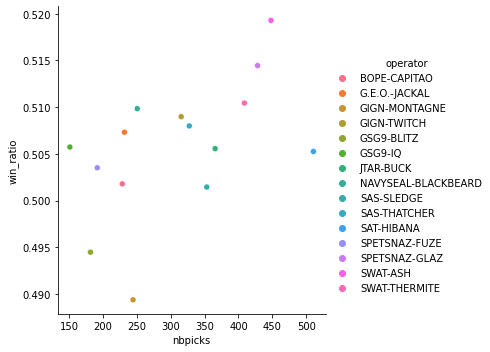

In [ ]:
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", data=ATT_operators_grap)
plt.show()

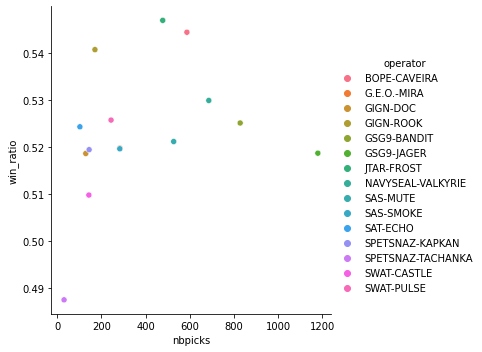

In [ ]:
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", data=DEF_operators_grap)
plt.show()

In [ ]:
ATT_operators.drop(["skillrank", "role", "operator", "secondarygadget"], axis=1 , inplace=True)

0.07782543967342191

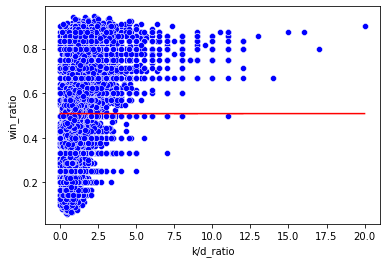

In [ ]:
from sklearn.linear_model import LinearRegression
predict = operators['win_ratio'].mean()
errors = predict - operators['win_ratio']
mean_absolute_error = errors.abs().mean()

y = operators['win_ratio']
x = operators['k/d_ratio']

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue')
mean_absolute_error

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


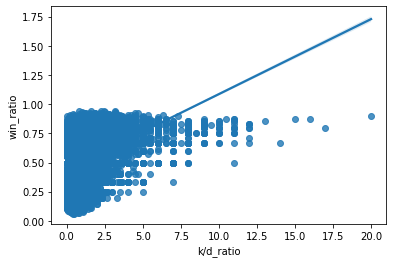

In [ ]:
sns.regplot(x, y)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
feature = ['k/d_ratio']
target = ['win_ratio']
X_train = operators[feature]
y_train = operators[target]
model.fit(X_train, y_train)



LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


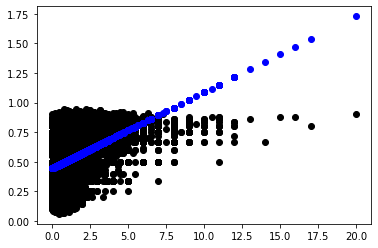

In [ ]:
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

X_test = [[x] for x in operators['k/d_ratio']]
y_pred = model.predict(X_test)
plt.scatter(X_train, y_train, color='black', linewidth=1)

plt.scatter(X_test, y_pred, color='blue', linewidth=1);

MAE = mean_absolute_error(X_test, y_pred)


In [ ]:
print("정확도 MAE :")
MAE

정확도 MAE :


0.5548065508550163

In [ ]:
#다중선형회귀 기본 골자
from sklearn.model_selection import train_test_split
x = ATT_operators[["nbwins" ,"nbkills","nbdeaths"]]
y = ATT_operators[['win_ratio']]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)
model = LinearRegression()
model = model.fit(x_train, y_train)

y_predict = model.predict(x_test)



In [ ]:
Hot_ATT_operators=ATT_operators[["primaryweapon","secondaryweapon","k/d_ratio","win_ratio"] ]
Hot_DEF_operators=DEF_operators[["primaryweapon","secondaryweapon","k/d_ratio","win_ratio"] ]

In [ ]:
Hot_ATT_operators = encoder.fit_transform(Hot_ATT_operators) # 원핫 인코딩 
Hot_DEF_operators = encoder.fit_transform(Hot_DEF_operators) # 원핫 인코딩 

In [ ]:


cols = Hot_DEF_operators[['primaryweapon_SMG','primaryweapon_SG','primaryweapon_AR']]
target = Hot_DEF_operators["k/d_ratio"]


In [ ]:
X_col = pd.DataFrame( data=cols)
y_target = pd.DataFrame( data=target)
linear = LinearRegression()
linear.fit(X_col, y_target)
print('R2: ', linear.score(X_col, y_target))
print('Intercept: ', linear.intercept_[0])


R2:  0.010836081026299516
Intercept:  2547698453798.9326


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


R2 0.002623978086583878


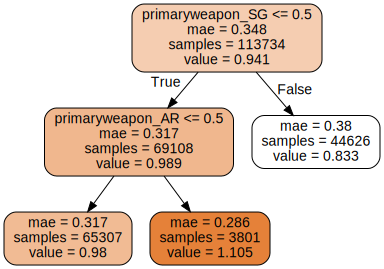

In [ ]:
import graphviz
from ipywidgets import interact
from sklearn.tree import DecisionTreeRegressor, export_graphviz

def show_tree(tree, colnames):
    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
    return graphviz.Source(dot)

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(criterion="mae")
tree.fit(X_col, y_target)
print('R2', tree.score(X_col, y_target))
show_tree(tree, colnames=X_col.columns)



R2:  0.026073903001090803
Intercept:  1.0029911965209035


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


R2 0.015332933452986364


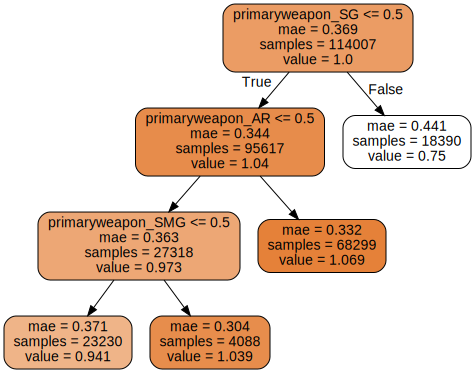

In [ ]:


cols = Hot_ATT_operators[['primaryweapon_SMG','primaryweapon_SG','primaryweapon_AR']]
target = Hot_ATT_operators["k/d_ratio"]

X_col = pd.DataFrame( data=cols)
y_target = pd.DataFrame( data=target)
linear = LinearRegression()
linear.fit(X_col, y_target)
print('R2: ', linear.score(X_col, y_target))
print('Intercept: ', linear.intercept_[0])

tree = DecisionTreeRegressor(criterion="mae")
tree.fit(X_col, y_target)
print('R2', tree.score(X_col, y_target))
show_tree(tree, colnames=X_col.columns)
